In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter


In [2]:
m1 = 1
m2 = 333000 # Sun 333000x heavier than earth
x1_0 = 1 # inititial position is one earth-sun distance away from the sun
y1_0 = 0
x2_0 = 0
y2_0 = 0
vx1_0 = 0
vy1_0 = np.sqrt(m2) # Circular motion v=sqrt(a*r) with a = m2 (since g=1, r12=1)
vx2_0 = 0
vy2_0 = 0


In [3]:
def dSdt(S, t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x2-x1)**2 +(y2-y1)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            m2/r12**3 * (x2-x1),
            m2/r12**3 * (y2-y1),
            m1/r12**3 * (x1-x2),
            m1/r12**3 * (y1-y2),
            ]

In [4]:
t = np.linspace(0,1,10000)

In [5]:
sol = odeint(dSdt, y0=[x1_0,y1_0,x2_0,y2_0,vx1_0,vy1_0,vx2_0,vy2_0],
             t = t)

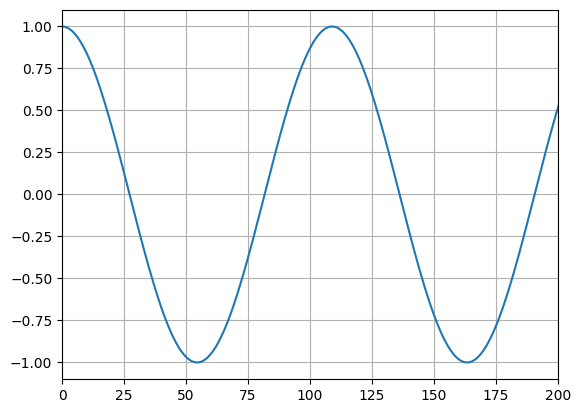

In [6]:
plt.plot(sol.T[0])
plt.xlim(0, 200)
plt.grid()

In [10]:
# get the time in units of years
#1) Conver to seconds (SI unit) using equation above
tt = 1/np.sqrt(6.67e-11 * 5.97e24 / (1.5e11) ** 3)
#2) Convert from seconds to years
tt = tt / (60*60*24*365.25) * np.diff(t)[0] # per time step (in years)


In [8]:
#get solution
x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]


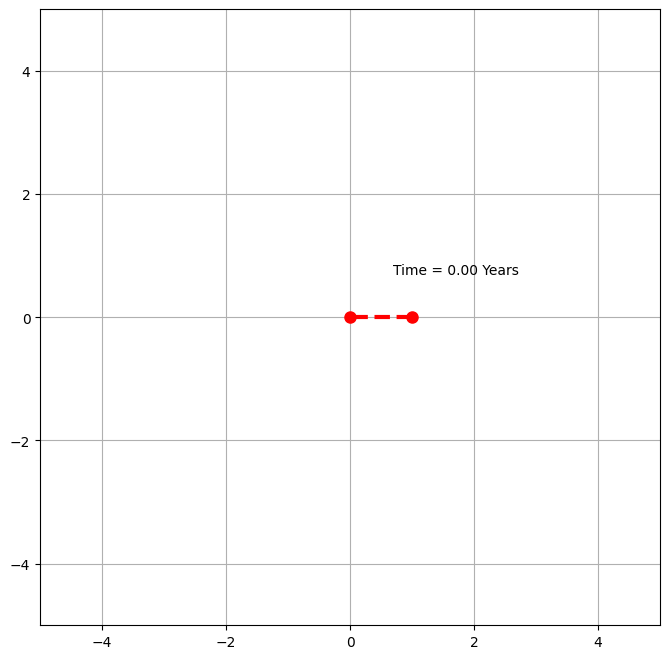

In [9]:
# Make animation 
def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    text.set_text('Time = {:.2f} Years'.format(i*tt))   
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([],[], "ro--", lw=3, markersize = 8)
text = plt.text(0.7,0.7, '')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)
ani = animation.FuncAnimation(fig, animate, frames=200, interval=50)
ani.save("plain.gif", writer="pillow", fps=30)


# 3Body Problem

https://arxiv.org/pdf/1303.0181.pdf
https://arxiv.org/pdf/1709.04775.pdf


These two papers look at the three body problem under the following configuration.

In [11]:
#
# PARARMS TO CHANGE
m3 = 1
v1 =  0.39295
v2 = 0.09758

# Everything else follows from paper
m1 = 1
m2 = 1 
m3 = m3
x1_0 = -1
y1_0 = 0
x2_0 = 1
y2_0 = 0
x3_0 = 0
y3_0 = 0
vx1_0 =  v1
vy1_0 =  v2
vx2_0 = v1
vy2_0 = v2
vx3_0 = -2*v1/m3
vy3_0 = -2*v2/m3

In [12]:
def dSdt(t, S):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r13 = np.sqrt((x3-x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            vx3,
            vy3,
            m2/r12**3 * (x2-x1) + m3/r13**3 * (x3-x1), #mass 1
            m2/r12**3 * (y2-y1) + m3/r13**3 * (y3-y1),
            m1/r12**3 * (x1-x2) + m3/r23**3 * (x3-x2), #mass 2
            m1/r12**3 * (y1-y2) + m3/r23**3 * (y3-y2),
            m1/r13**3 * (x1-x3) + m2/r23**3 * (x2-x3), #mass 3
            m1/r13**3 * (y1-y3) + m2/r23**3 * (y2-y3)
           ]

In [13]:
t = np.linspace(0, 20, 1000)

In [14]:
sol = solve_ivp(dSdt, (0,20), y0=[x1_0, y1_0, x2_0, y2_0, x3_0, y3_0,
                       vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0],
                method = 'DOP853', t_eval=t, rtol=1e-10, atol=1e-13)

In [15]:
t = sol.t
x1 = sol.y[0]
y1 = sol.y[1]
x2 = sol.y[2]
y2 = sol.y[3]
x3 = sol.y[4]
y3 = sol.y[5]

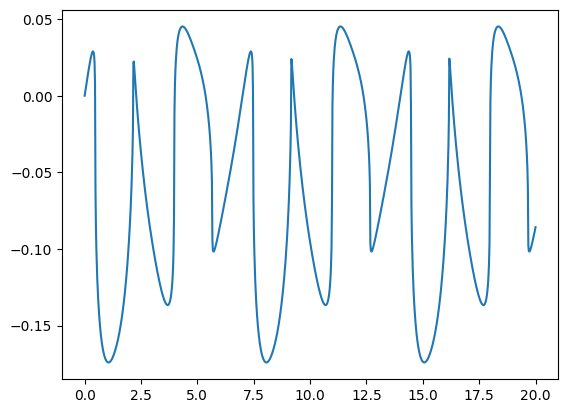

In [16]:

plt.plot(t, y1)

In [17]:
tt = 1/np.sqrt(6.67e-11 * 1.99e30 / (1.5e11)**3 ) # seconds
tt = tt / (60*60 * 24* 365.25) * np.diff(t)[0] # per time step (in years)

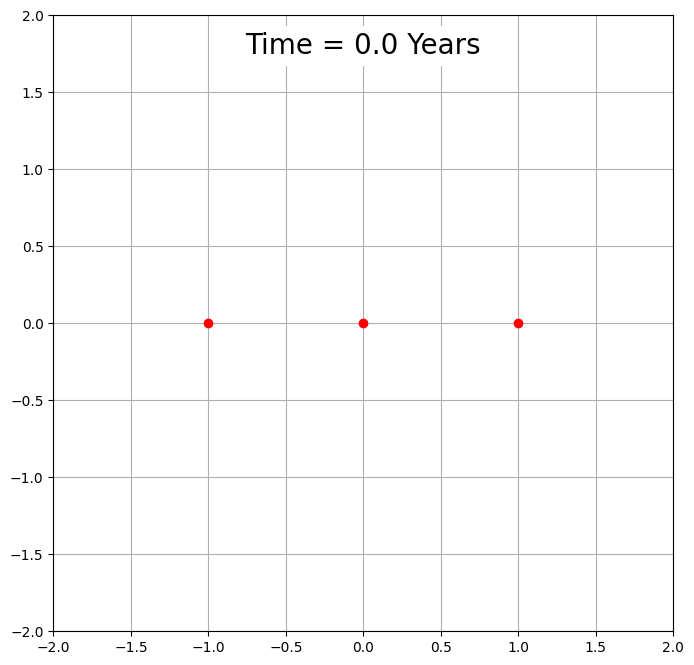

In [19]:

def animate(i):
    ln1.set_data([x1[i], x2[i], x3[i]], [y1[i], y2[i], y3[i]])
    text.set_text('Time = {:.1f} Years'.format(i*tt))
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro', lw=3, markersize=6)
text = plt.text(0, 1.75, 'asdasd', fontsize=20, backgroundcolor='white', ha='center')
ax.set_ylim(-2, 2)
ax.set_xlim(-2,2)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('3dot.gif',writer='pillow',fps=30)